Background Information :- 

BobaWonder and WaterCure Sales list on Monthly basis from January to August.

Pearson Correlation Coefficient: 0.86 P-value: 0.0061 Interpretation of the two product with each other is strog positive correlation.

BobaWonder Sales List of value [900, 800, 639, 772, 682, 635, 538, 716] WaterCure Sales List of value [890, 700, 523, 612, 661, 456, 435, 452].

Months with Sales Below $40,000:

June 2024: Sales = $35,793, Avg. Temperature = 15.43°C

July 2024: Sales = $35,137, Avg. Temperature = 13.84°C

August 2024: Sales = $22,200, Avg. Temperature = 16.23

Positive: Reviews where the compound sentiment score was 0.05 or higher.

Neutral: Reviews with a score between -0.05 and 0.05.

Negative: Reviews with a compound score of -0.05 or lower.


In [566]:
!pip install textblob
!pip install wordcloud
!pip install pillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)

#load the data file from the our system for the use
daily_salesC_df=pd.read_csv('daily_sales_cleaned.csv')

# chnage to data tieme indes
daily_salesC_df['Date']=pd.to_datetime(daily_salesC_df['Date'])
daily_salesC_df.head()

,Date,Daily Units Sold,Daily Unit Price,Daily Temperature (C),Sales Revenue
0,2024-01-01,91,24.0,25,2184.0
1,2024-01-02,90,24.0,24,2160.0
2,2024-01-03,70,24.0,19,1680.0
3,2024-01-04,89,24.0,23,2136.0
4,2024-01-05,100,24.0,36,2400.0


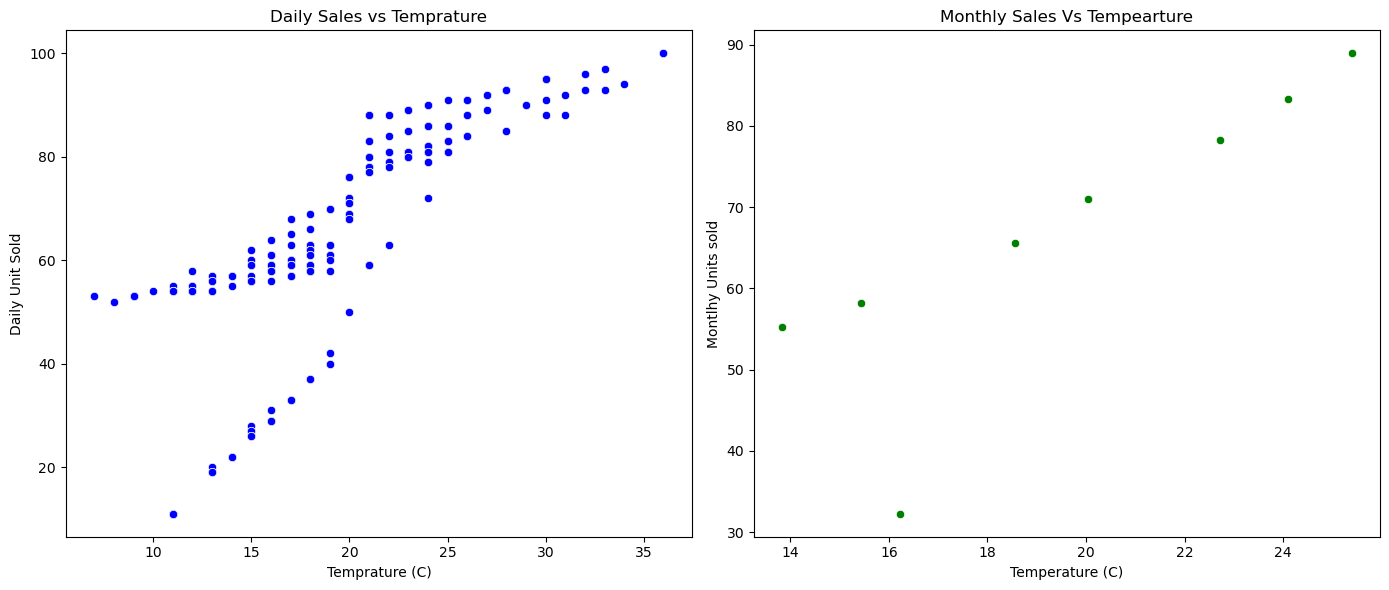

In [567]:
# plot the data visulization 

# resample the data before using it
monthly_data = daily_salesC_df.resample('ME', on='Date').mean()
monthly_data

#1. Correlation between Sales Performance and Temperature (Daily and Monthly)
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=daily_salesC_df['Daily Temperature (C)'], y=daily_salesC_df['Daily Units Sold'], color='b')
plt.title('Daily Sales vs Temprature')
plt.xlabel('Temprature (C)')
plt.ylabel('Daily Unit Sold')
    
# Monthly Data Visualization
# Resample the data on monthly basis

plt.subplot(1,2,2)
sns.scatterplot(x=monthly_data['Daily Temperature (C)'], y=monthly_data['Daily Units Sold'], color='g')
plt.title('Monthly Sales Vs Tempearture')
plt.xlabel('Temperature (C)')
plt.ylabel('Montlhy Units sold')

plt.tight_layout()
plt.show()


Interpretaion:- 

The Daily Sales vs Temperature plot shows a clear positive relationship between temperature and daily units sold. As the temperature rises, daily sales also increase, with a noticeable clustering of higher sales at higher temperatures.

The Monthly Sales vs Temperature plot similarly exhibits a positive correlation, where months with higher average temperatures correspond to higher monthly units sold. This suggests a consistent sales pattern over time.

Summary:- 

Both plots confirm that as the temperature increases, sales performance tends to improve, with the monthly data offering a smoother, aggregated view of this trend compared to the more granular daily data.
Summary :- As we can clearly see the number of units sold on daily and monthly basis increase as tempearature rises.


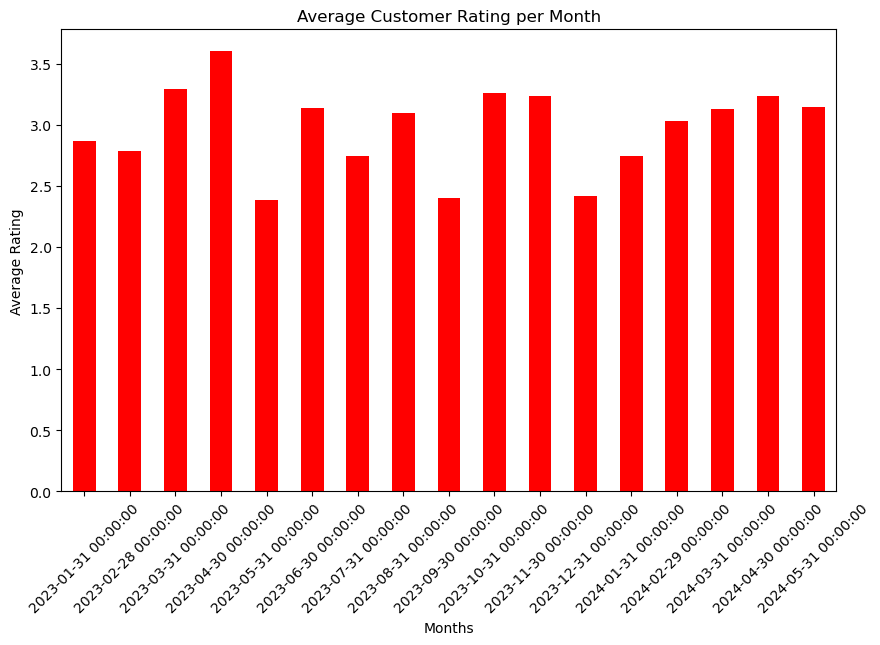

In [569]:
# for Average customer ratings for each month

#read the csv file for the rating
rating_df=pd.read_csv('Kaurav_a_sentiment.csv')

# change datatype to numeric
rating_df['Review Date']=pd.to_datetime(rating_df['Review Date'])

# change datatypr to numeric
rating_df['Rating'] = pd.to_numeric(rating_df['Rating'], errors='coerce')

# change column name
rating_df.rename(columns={'Review Date':'Date'}, inplace=True)
rating_df.set_index('Date', inplace=True)
rating_df
# reasample the data
monthly_rating_df=rating_df['Rating'].resample('ME').mean()
monthly_rating_df

# plot the bar chart for the following 

plt.figure(figsize=(10,6))
monthly_rating_df.plot(kind='bar', color='r')
plt.title('Average Customer Rating per Month')
plt.xlabel('Months')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Summary :- 

--> The chart shows average monthly customer ratings fluctuating between 2.5 and 3.5.

--> March and July 2023 have the highest ratings, peaking above 3.5.

--> Lower ratings occur in June and August 2023, falling below 3.0.

--> Overall, ratings remain fairly stable around 3.0, indicating moderate customer satisfaction.

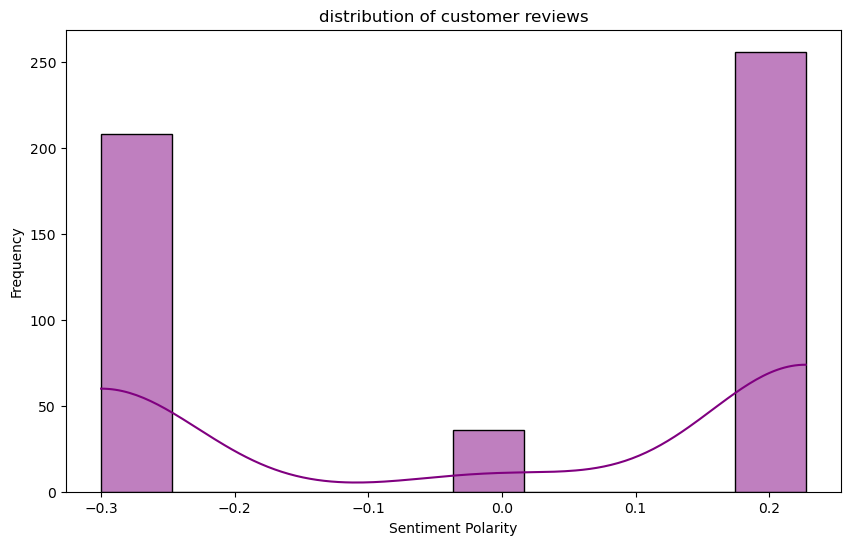

In [571]:
# For Sentiment Analysis of the reviews and then plotting it in histogram.

# calculate sentiment polarity in numbers
rating_df['Sentiment Polarity']=rating_df['sentiment'].apply(lambda x:TextBlob(x).sentiment.polarity)
rating_df

#plot the graph
plt.figure(figsize=(10,6))
sns.histplot(rating_df['Sentiment Polarity'], kde=True, color='purple')
plt.title('distribution of customer reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Summary :- 

The chart displays how customer review sentiments are spread out, with most reviews falling into two main groups: one around the negative side (-0.3) and another on the positive side (0.2). There are fewer neutral reviews in the middle (around 0). Overall, it seems like customers tend to either have strong negative or positive feelings, with less middle-ground feedback.

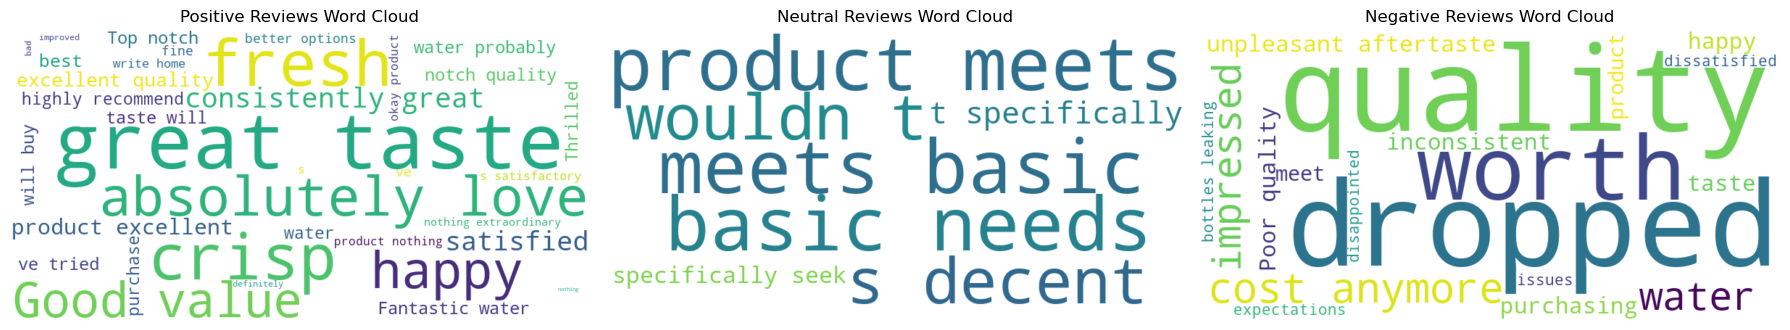

In [573]:
## now plpt wordcloud for customers 

# Categorize reviews into positive, neutral, and negative
rating_df['Sentiment Category'] = rating_df['Sentiment Polarity'].apply(
    lambda x: 'Positive' if x > 0.2 else ('Negative' if x < -0.2 else 'Neutral'))
    
# Generate word clouds
plt.figure(figsize=(18, 6))

for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    plt.subplot(1, 3, i+1)
    text = ' '.join(rating_df[rating_df['Sentiment Category'] == sentiment]['Review Text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} Reviews Word Cloud')

plt.tight_layout()
plt.show()

Summary:- 

The words that are represented here are taken from the reviews provided by cutomers, and it takes contain all positive, negative and neutal words.